### CNN(Convolution Neural Network) - 합성곱 신경망

## 학습 내용
* CNN의 기본 이해 
* CNN 실습해보기

In [6]:
from IPython.display import display, Image
import os, warnings

warnings.filterwarnings(action='ignore')

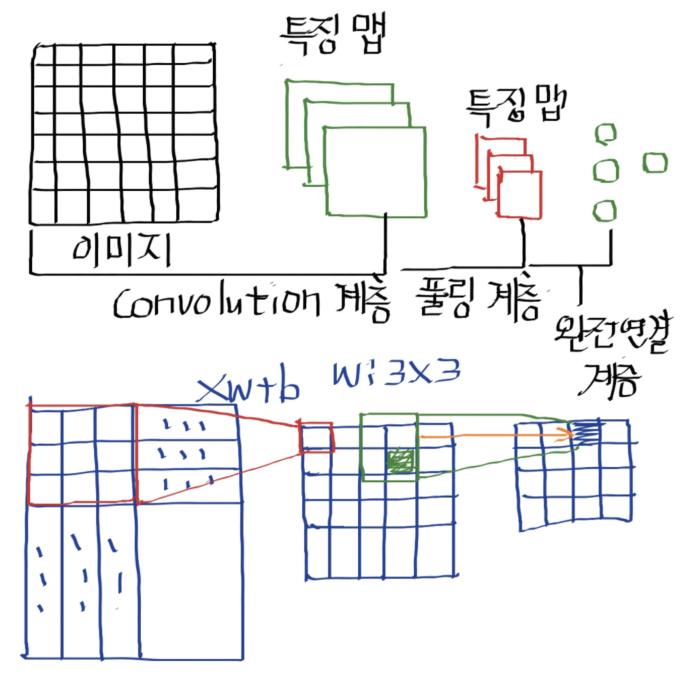

In [7]:
display(Image(filename="../img/cnn.png"))

### 01 데이터 준비하기
* MNIST 데이터 셋 준비

In [8]:
# 이미지 처리 분야에서 가장 유명한 신경망 모델인 CNN 을 이용
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [9]:
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])

### 02 CNN 계층 구성

In [11]:
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))  # W1 커널
L1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)  # 활성화 함수
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
print(L1)

Tensor("MaxPool_1:0", shape=(?, 14, 14, 32), dtype=float32)


In [25]:
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

* 앞의 풀링 계층의 크기가 7 X 7 X 64 이므로, tf.reshape함수를 이용. 1차원으로 만듬.
* 인접한 계층의 모든 뉴런과 상호 연결된 계층을 완전 연결 계층(fully connect layer)라 한다
* 마지막 층의 뉴런수는 256개.

In [26]:
W3 = tf.Variable(tf.random_normal([7 * 7 * 64, 256], stddev=0.01))
L3 = tf.reshape(L2, [-1, 7 * 7 * 64])
L3 = tf.matmul(L3, W3)
L3 = tf.nn.relu(L3)

In [27]:
# 최종 출력값 L3 에서의 출력 256개를 입력값으로 받아서 
# 0~9 레이블인 10개의 출력값을 만듭니다.
W4 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L3, W4)

### 비용함수, 최적화 함수 구성

In [28]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, 
                                                                 labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

### 신경망 모델 학습 

In [29]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

### 1 epoch(데이터 전체 학습 한번)만 돌리기

In [30]:
%%time

total_cost = 0
epoch = 0
for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    # 이미지 데이터를 CNN 모델을 위한 자료형태인 [28 28 1] 의 형태로 재구성합니다.
    batch_xs = batch_xs.reshape(-1, 28, 28, 1)

    _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys})
    total_cost += cost_val

print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!(1 epoch)')

Epoch: 0001 Avg. cost = 0.318
최적화 완료!(1 epoch)
Wall time: 43.1 s
